<p style ='color:orange;font-size:25px;text-align:center'><b>GRIP-THE_SPARKS_FOUNDATION_INTERNSHIP</b></p>
<br></br>


<p style = 'font-size:20px;color:purple'><b><u> Problem Statement : From the given 'Iris' dataset, predict the optimum no. of clusters and represent it visually </u></b></p>
<p style = 'font-size:18px;color:black'> Machine Learning Algorithm used : KMeans clustering </p>
<p ><b>Author:</b> Tamanna </p>



## Importing basic lib

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

## Loading the data set 

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Preparing data set 

In [3]:
# consider first 4 columns 
x=iris_df.iloc[:,[0,1,2,3]].values 


In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## correlation between the features 

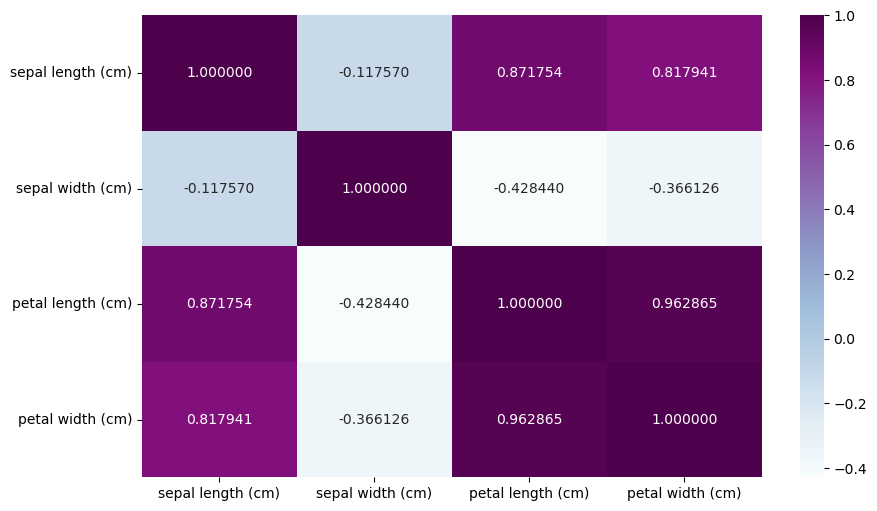

In [7]:
plt.figure(figsize=(10,6)) 
sns.heatmap(iris_df.corr(),annot=True,fmt="f",cmap="BuPu")
plt.show()


## From the above plot we can say that there is a strong correlation between petal length and sepal length also betweem petal width and sepal length in addition to this we can see there is a correlation between petal length and petal width

In [8]:
# importing necessery lib 
from sklearn.cluster import KMeans

## Calculating within cluster sum of square (wccs) in order to understand which value of k should be take so that we can get least distance between data points and center of the cluster i.e more compact or data points are very close to each other within the cluster

In [9]:
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.420191786283894,
 30.064593073593073,
 28.332569264069267,
 25.972596377306907]

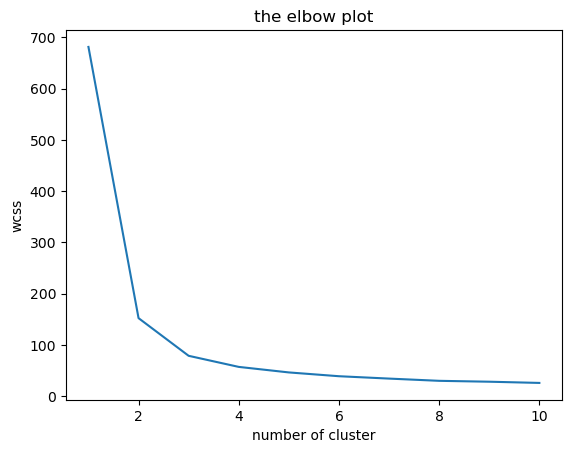

In [10]:
plt.plot(range(1,11),wcss)
plt.title('the elbow plot')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

## From the above elbow plot it is clear that when we take k = 3 the data points within the cluster will be very close to each other 

<p style='font-family:Sans-serif;font-size:20px;color:GREY'> using silhouette score  we are confirming whether we got correct number of k from the elbow plot or not </p>

In [15]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00


In [16]:
from yellowbrick.cluster import KElbowVisualizer

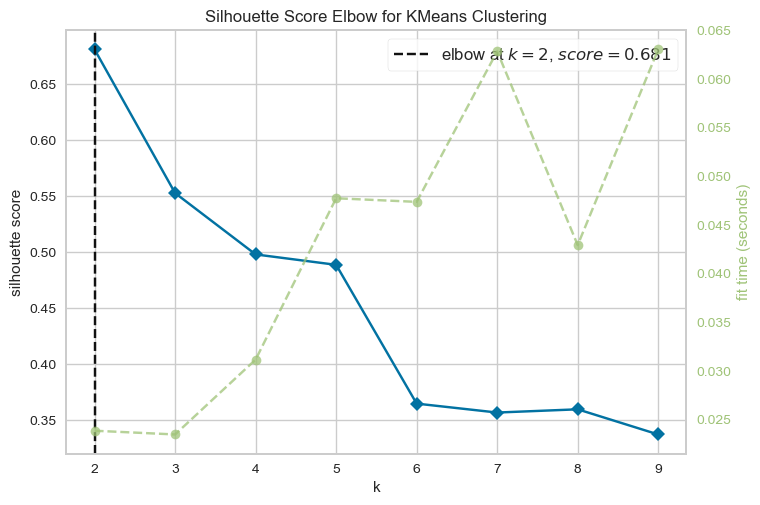

In [17]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(x)
visualizer.show()
plt.show()
# from the below plot we can conclude that we can take number of cliusters as 3 

## Preparing unsupervised(clustering algo) kmean algorithm  

In [18]:
kmeans = KMeans(n_clusters =3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = iris_df.iloc[:, [0,1,2,3]].values
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [19]:
df_kmean = iris_df.copy()

In [20]:
label  = pd.DataFrame(y_kmeans, columns= ['label'])
label.head()

,label
0,1
1,1
2,1
3,1
4,1


In [21]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [22]:
df_kmean.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


In [23]:
df_kmean.label.value_counts()

0    62
1    50
2    38
Name: label, dtype: int64

 we can see we have 3 clusters namely <ul style='font-size:20px;color:PURPLE'><li>0 cluster: 62 data points</li><li>1 cluster: 50 data points</li><li>2 cluster: 38 data points</li></ul></p>

## Visualization of kmean clustering with 3 clusters   

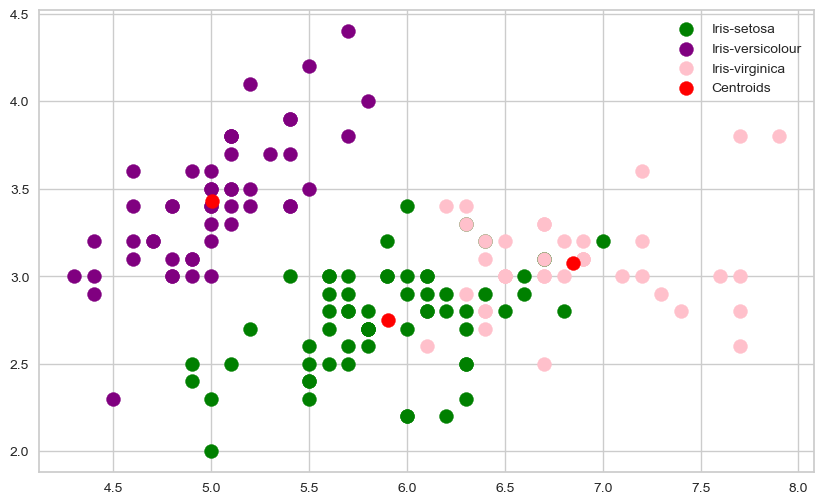

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'GREEN', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'PURPLE', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'PINK', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'RED', label = 'Centroids')
plt.legend()
plt.show()